In [1]:
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/samplesuperstore/SampleSuperstore.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
cf.go_offline()

In [3]:
df=pd.read_csv("../input/samplesuperstore/SampleSuperstore.csv")
df.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()
# It is the function that show the analysis of numerical values.

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.dtypes
# It shows the data type in the data set.

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [6]:
df.isnull().sum()
# Count null values

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [7]:
# Shows the property value in the data set.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
#Rename data's columns
df.rename(columns={'Ship Mode':'Ship_Mode','Postal Code':'Postal_Code','Sub-Category':'Sub_Category'},inplace=True)
df.head()

,Ship_Mode,Segment,Country,City,State,Postal_Code,Region,Category,Sub_Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [9]:
#getting the numerical columns
num_col=df.select_dtypes(include=["int64","float64"])
num_col.head()

,Postal_Code,Sales,Quantity,Discount,Profit
0,42420,261.9600,2,0.00,41.9136
1,42420,731.9400,3,0.00,219.5820
2,90036,14.6200,2,0.00,6.8714
3,33311,957.5775,5,0.45,-383.0310
4,33311,22.3680,2,0.20,2.5164


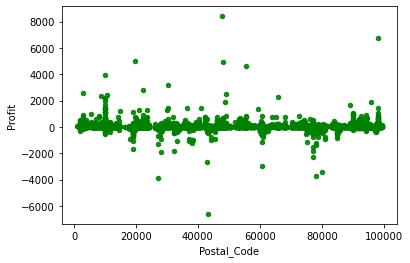

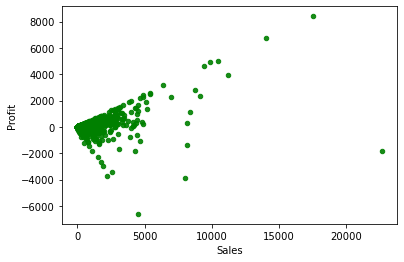

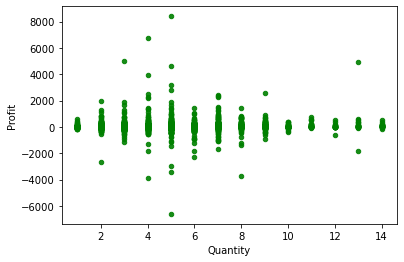

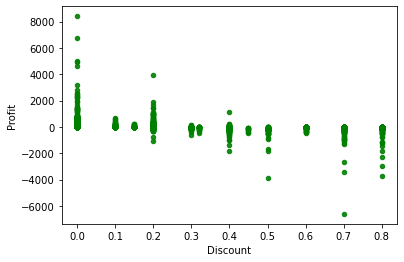

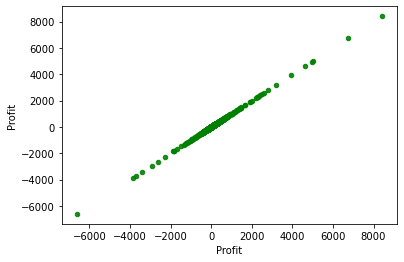

In [10]:
### Scatter plot to know about the Profit with respect to each columns 
for feature in num_col.columns:
    num_col.plot(kind="scatter",x=feature,y="Profit",alpha=0.9,color="green")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01e4183690>,
      dtype=object)

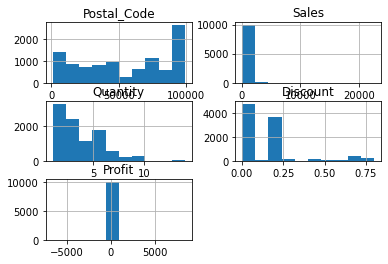

In [11]:
#plotting the histogram for columns,which will show us the count of each columns and values
num_col.hist()

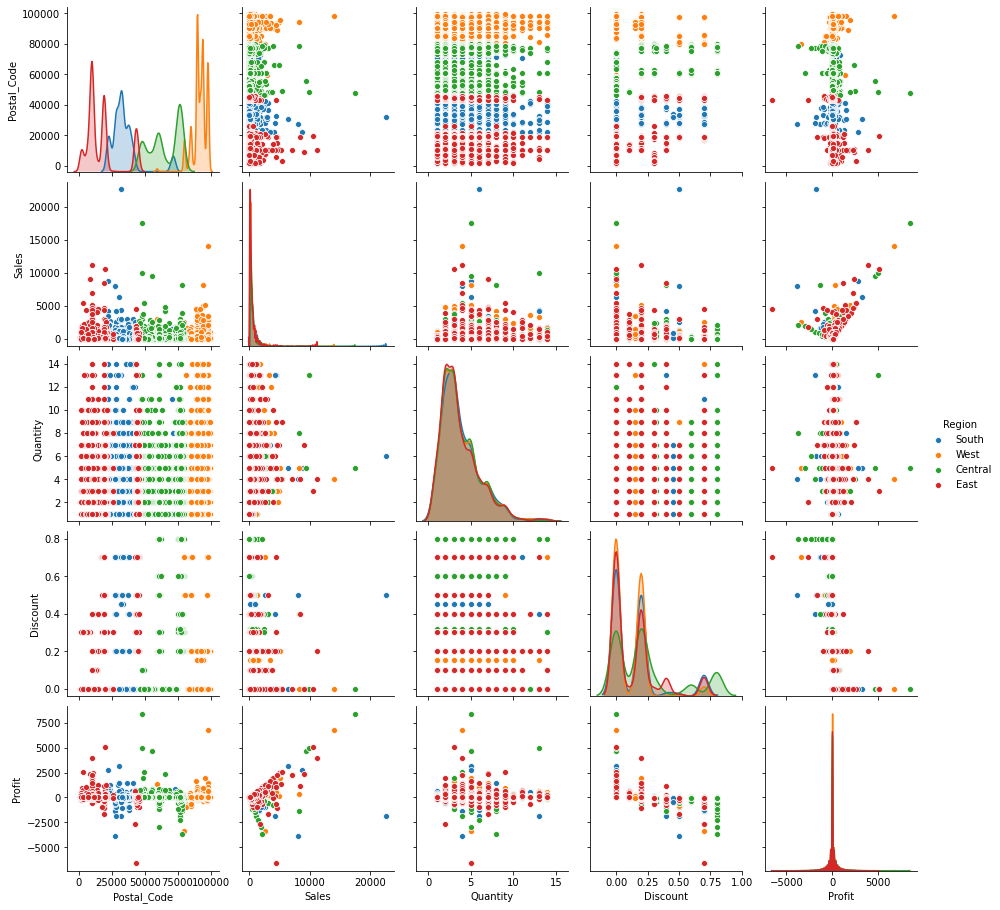

In [12]:
## helps to separate the values by Region
## we can see the contribution of each region in every section
#we can clearly see that East and Central region has more contributions 
sns.pairplot(df,hue = "Region")


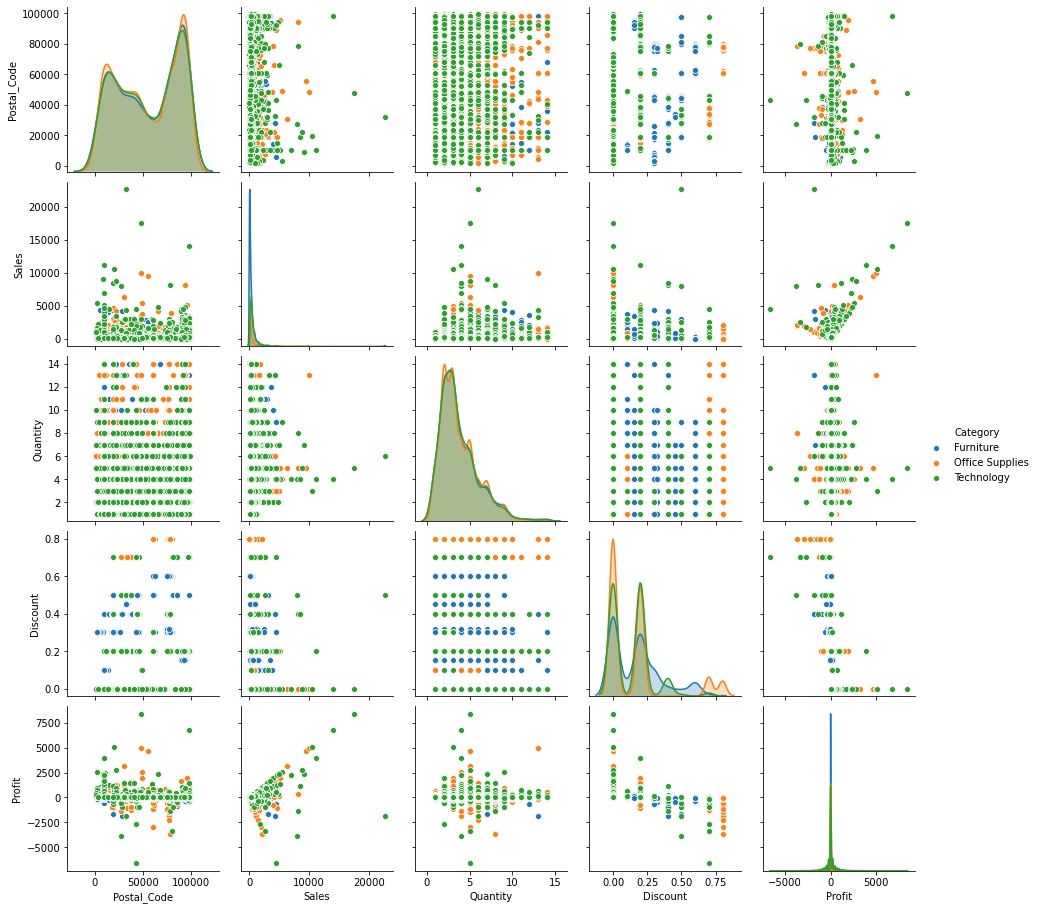

In [13]:
## we can see the contribution of each Category in every section
## wee can see that Technology has the most controbution towards each field
sns.pairplot(df,hue = "Category")

In [14]:
#getting the categorical columns
cat_col=df.select_dtypes(include=["object"])
cat_col.head()

,Ship_Mode,Segment,Country,City,State,Region,Category,Sub_Category
0,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Bookcases
1,Second Class,Consumer,United States,Henderson,Kentucky,South,Furniture,Chairs
2,Second Class,Corporate,United States,Los Angeles,California,West,Office Supplies,Labels
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Tables
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Storage


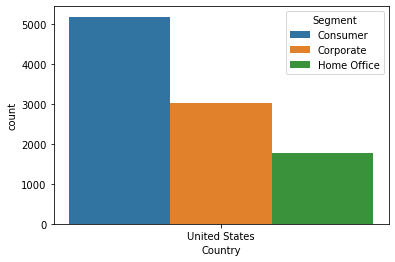

In [15]:
#count of segment 
#we can clearly se that most of it are Consumers
sns.countplot(x="Country",hue="Segment",data=df)

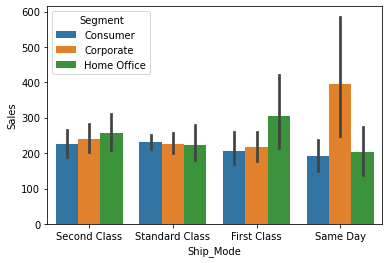

In [16]:
#Sales by ship_mode
#for second and Standard class we can't see much difference in sales  by Segment 
#But for first class, sales for Hoome office is more and for same day,sales for Corporate is more
sns.barplot(x="Ship_Mode",y="Sales",hue="Segment",data=df)

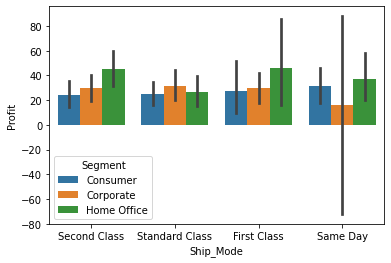

In [17]:
# The profit for second class and first class is higher then other two segment
# The profit of  Same day is very less in case of  corporate
sns.barplot(x="Ship_Mode",y="Profit",hue="Segment",data=df)

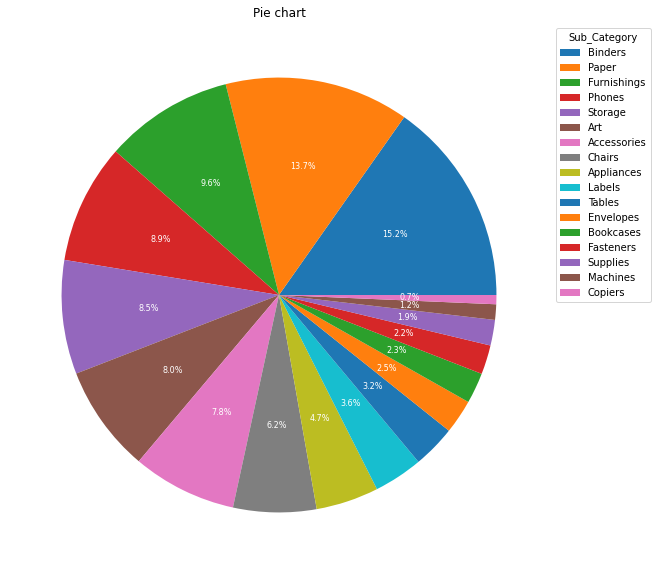

In [18]:
## plotting a pie chart to know about the percentage amount of sub_categorys 

# create a dictionary of Sub_Category and their totals
d = df["Sub_Category"].value_counts().to_dict()
# instanciate the figure
fig = plt.figure(figsize = (28, 10))
ax = fig.add_subplot()


# plot the data using matplotlib
ax.pie(d.values(), # pass the values from our dictionary
       labels = d.keys(), # pass the labels from our dictonary
       autopct = '%1.1f%%', # specify the format to be plotted
       textprops = {'fontsize': 8, 'color' : "white"} # change the font size and the color of the numbers inside the pie
      )


# prettify the plot

# set the title
ax.set_title("Pie chart")

# set the legend and add a title to the legend
ax.legend(loc = "upper left", bbox_to_anchor = (1, 0, 0.7, 1), fontsize = 10, title = "Sub_Category");

In the above graph we can see that most count of Subcategory is for Blinders i.e 15.2%,followed by Papers i.e 13.7% and Bookcases i.e 9.6%  

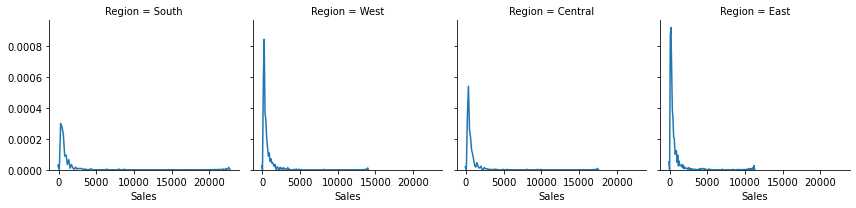

In [19]:
# here we can see the sales per each Region
g = sns.FacetGrid(df,col='Region')
g = g.map(sns.kdeplot, 'Sales')


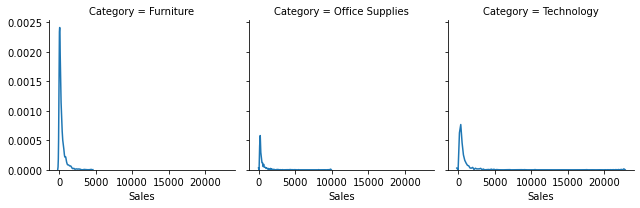

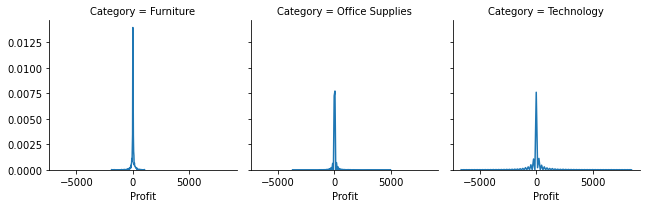

In [20]:
#Here we can see Sales per each Category and Profit per each Category
j = sns.FacetGrid(df,col='Category')
j = j.map(sns.kdeplot, 'Sales')
h = sns.FacetGrid(df,col='Category')
h = h.map(sns.kdeplot, 'Profit')

Text(0, 0.5, 'count')

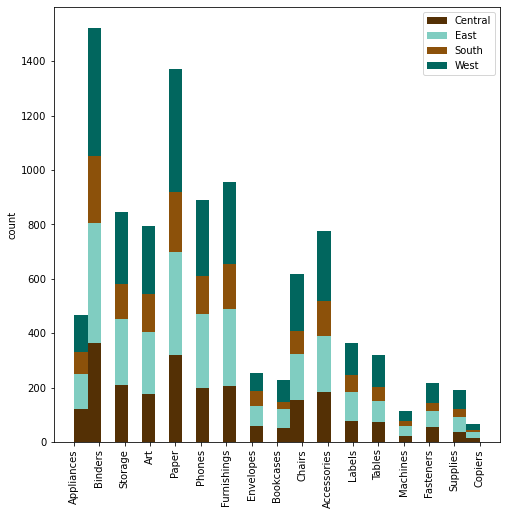

In [21]:
#Frequency of regions per each Sub_category
gb_df = df[["Region","Sub_Category"]].groupby("Region")
lx = []
ln = []
# handpicked colors
colors = ["#543005","#80cdc1","#8c510a","#01665e"]
# iterate over very groupby group and 
# append their values as a list
# THIS IS A CRUCIAL STEP
for _, df_ in gb_df:
    lx.append(df_["Sub_Category"].values.tolist())
    ln.append(list(set(df_["Region"].values.tolist()))[0])
# instanciate the figure
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot()

# hist returns a tuple of 3 values
# let's unpack it
n, bins, patches = ax.hist(lx, bins = 30, stacked = True, density = False,color = colors)
# rotate the x axis label
ax.tick_params(axis = 'x', labelrotation = 90)

# add a custom legend wit class and color
# you have to pass a dict
ax.legend({class_:color for class_, color in zip(ln, colors)})

# set an y label
ax.set_ylabel("count")

In the above graph we can see that total sales count of product .Bimders is most i.e around 1600 followe by paper i.e around 1400

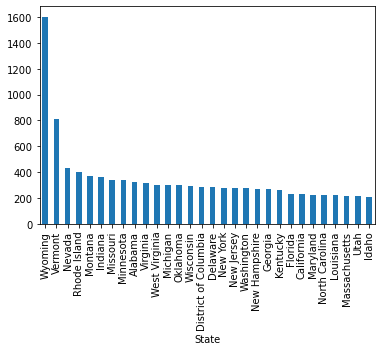

In [22]:
#sales by top 30 State 
df.groupby("State").Sales.mean().sort_values(ascending=False)[:30].plot.bar()

- In the avove graph we can see that the sales is double i Wyoming ass compare to other state around 1600 ,next is Vermont with 800 sales and rest 28 states have sales mean around 300-350.

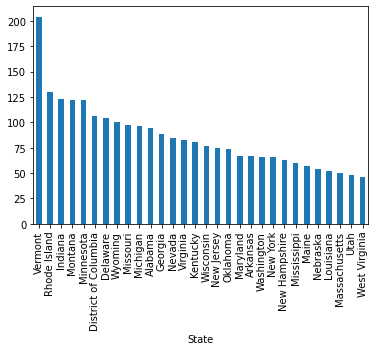

In [23]:
#Profit by top 30 State 
df.groupby("State").Profit.mean().sort_values(ascending=False)[:30].plot.bar()

- In the avove graph we can see that the Profit of Vermont is highest followed by Rhode isiland and Indiana .
- We can notoce that the sales of Vermont is 2nd heighwst but the profit is max.
- Though the sales of Wyoming is most but in case of profit it stands in 8th position.

In [24]:
# Each Sub_category sales by Region
import plotly.express as px
fig = px.scatter(df,df["Sub_Category"], df["Sales"],color=df["Region"])
fig.show()

from the above graph we can see that,
 - IN East region , sales done for all Sub_category
 - South region has the most sales i.e 22.6k on product Machines
 - Next is in Central region i.e 17.5k on product Copiers
 - Next is in West region i.e 14k on product Copiers
 

In [25]:
# Each Sub_category Profit by Region
fig = px.scatter(df,df["Sub_Category"], df["Profit"],color=df["Region"])
fig.show()

From the above graph we can see that,
- Max profit gain from Central region for product Copiers i.e around 8400 followed by West region for product Copiers i.e around 6720
- Max Loss is from East region for product Machines i.e around 6600 followed by South region for product Machines i.e around 3840.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0, 'Fasteners'),
 Text(0, 0, 'Art'),
 Text(0, 0, 'Labels'),
 Text(0, 0, 'Paper'),
 Text(0, 0, 'Envelopes'),
 Text(0, 0, 'Furnishings'),
 Text(0, 0, 'Binders'),
 Text(0, 0, 'Accessories'),
 Text(0, 0, 'Appliances'),
 Text(0, 0, 'Supplies'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Phones'),
 Text(0, 0, 'Bookcases'),
 Text(0, 0, 'Chairs'),
 Text(0, 0, 'Tables'),
 Text(0, 0, 'Machines'),
 Text(0, 0, 'Copiers')]

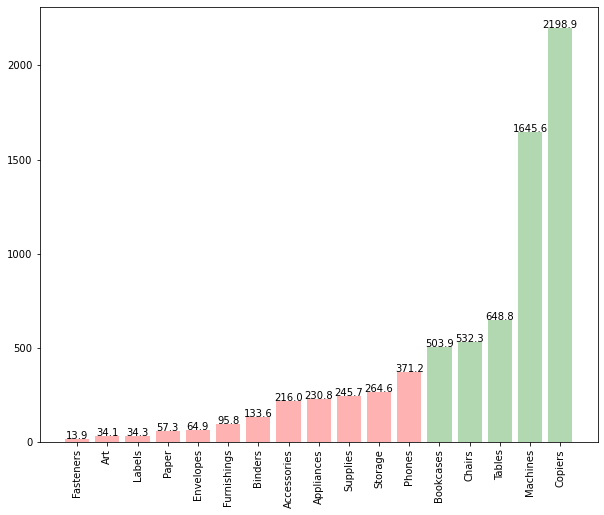

In [26]:
# sales for each Sub_category
gb_df = df.groupby(["Sub_Category"])["Sales","Quantity","Discount","Profit","Region"].mean()
gb_df.sort_values(by=["Sales"], inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["Sales"]
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
     # add some text
    ax.text(x_, y_ + 0.3, round(y_, 1), horizontalalignment = 'center')
ax.set_xticklabels(x, rotation=90)    
    


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0, 'Supplies'),
 Text(0, 0, 'Copiers'),
 Text(0, 0, 'Envelopes'),
 Text(0, 0, 'Phones'),
 Text(0, 0, 'Appliances'),
 Text(0, 0, 'Furnishings'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Art'),
 Text(0, 0, 'Paper'),
 Text(0, 0, 'Bookcases'),
 Text(0, 0, 'Chairs'),
 Text(0, 0, 'Machines'),
 Text(0, 0, 'Accessories'),
 Text(0, 0, 'Labels'),
 Text(0, 0, 'Tables'),
 Text(0, 0, 'Binders'),
 Text(0, 0, 'Fasteners')]

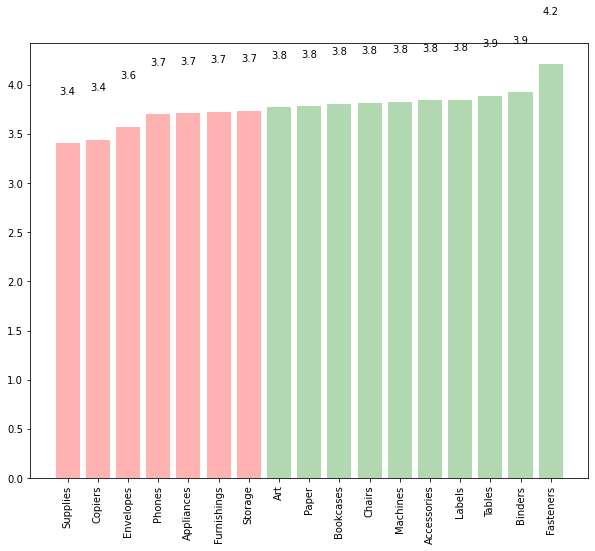

In [27]:
# Average quantity sales by each Sub_category
gb_df = df.groupby(["Sub_Category"])["Sales","Quantity","Discount","Profit","Region"].mean()
gb_df.sort_values(by=["Quantity"], inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["Quantity"]
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
     # add some text
    ax.text(x_, y_ + 0.5, round(y_, 1), horizontalalignment = 'center')
ax.set_xticklabels(x, rotation=90)    
    

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



[Text(0, 0, 'Tables'),
 Text(0, 0, 'Bookcases'),
 Text(0, 0, 'Supplies'),
 Text(0, 0, 'Fasteners'),
 Text(0, 0, 'Art'),
 Text(0, 0, 'Furnishings'),
 Text(0, 0, 'Labels'),
 Text(0, 0, 'Binders'),
 Text(0, 0, 'Paper'),
 Text(0, 0, 'Storage'),
 Text(0, 0, 'Envelopes'),
 Text(0, 0, 'Machines'),
 Text(0, 0, 'Appliances'),
 Text(0, 0, 'Chairs'),
 Text(0, 0, 'Phones'),
 Text(0, 0, 'Accessories'),
 Text(0, 0, 'Copiers')]

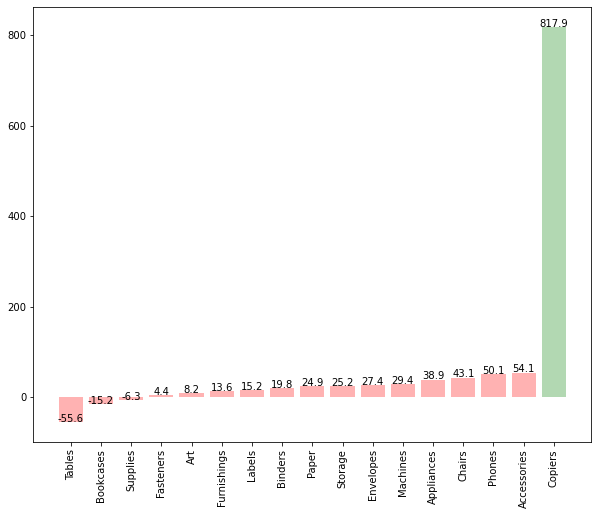

In [28]:
# average profit for each Sub_category
gb_df = df.groupby(["Sub_Category"])["Sales","Quantity","Discount","Profit","Region"].mean()
gb_df.sort_values(by=["Profit"], inplace = True)
# fitler x and y
x = gb_df.index
y = gb_df["Profit"]
# instanciate the figure
fig = plt.figure(figsize = (10, 8))
ax = fig.add_subplot()
# plot the data
for x_, y_ in zip(x, y):
    # this is very cool, since we can pass a function to matplotlib
    # and it will plot the color based on the result of the evaluation
    ax.bar(x_, y_, color = "red" if y_ < y.mean() else "green", alpha = 0.3)
     # add some text
    ax.text(x_, y_ + 0.5, round(y_, 1), horizontalalignment = 'center')
ax.set_xticklabels(x, rotation=90)    
    

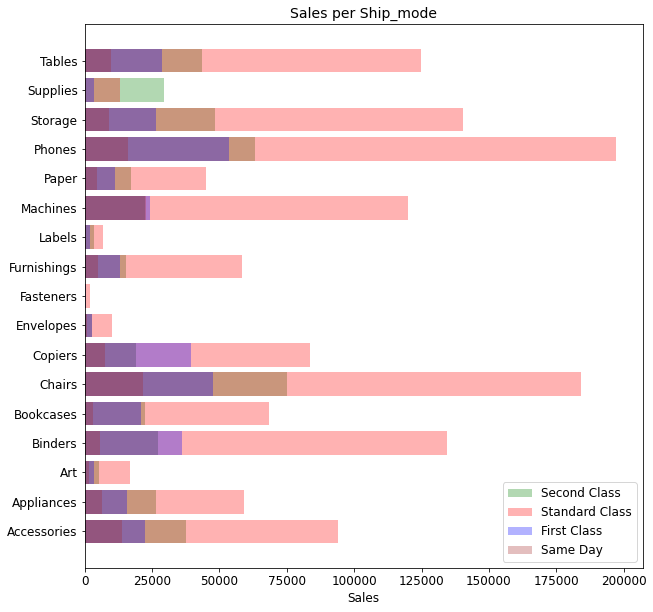

In [29]:
# sales for each sub_category by ship mode
# prepare the data for plotting
gb_df = df.groupby(["Sub_Category", "Ship_Mode"])["Sales"].sum().to_frame().reset_index()
gb_df.set_index("Sub_Category", inplace = True)

# separate the different groups to be plotted
x_Second = gb_df[gb_df["Ship_Mode"] == "Second Class"]["Sales"]
x_Standard = gb_df[gb_df["Ship_Mode"] == "Standard Class"]["Sales"]
x_First = gb_df[gb_df["Ship_Mode"] == "First Class"]["Sales"]
x_Same = gb_df[gb_df["Ship_Mode"] == "Same Day"]["Sales"]

# ----------------------------------------------------------------------------------------------------
# instanciate the figure
fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot()

# ----------------------------------------------------------------------------------------------------
# plot the data
ax.barh(x_Second.index, x_Second, color = "green", alpha = 0.3, label = "Second Class")
ax.barh(x_Standard.index, x_Standard, color = "red", alpha = 0.3, label = "Standard Class")
ax.barh(x_First.index, x_First, color = "blue", alpha = 0.3, label = "First Class")
ax.barh(x_Same.index, x_Same, color = "brown", alpha = 0.3, label = "Same Day")
# ----------------------------------------------------------------------------------------------------
# prettify the plot
# add the legend to a specific location
ax.legend(loc = "lower right", fontsize = 12)
# set xlabel
ax.set_xlabel("Sales", fontsize = 12)
# set the title for the plot
ax.set_title("Sales per Ship_mode", fontsize = 14)
# change the x and y ticks to a smaller size
ax.tick_params(axis = 'y', labelsize = 12)
ax.tick_params(axis = 'x', labelsize = 12)

From the above graph we can see that ,
- The total sales for Phones is most i.e around 2,00,000 followed by Chairs i.e more then 1,75,000 and Storage i.e more then 1,25,000
- We can clearly see that in the total sales for each sub_category, the most are for Standard_class followed by First_class

In [30]:
# Sales_amount,Discount,Profit of each data points in our dataset
df[["Sales","Discount","Profit"]].iplot(kind='spread',size=62)

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



from the above graph we can see that ,
- For point 2688 i.e from U.S,Illinois and for Binders the sales is most i.e more then 20k and Profit is half of sales value.The most important thing is here discount is 0.
- The second most sales point is 6828 i.e for U.S,Indiana and for Binders the sales is most i.e around 18k,profit rate is max i.e around 17 and discount rate  is 0.2.
- For the point 7771 i.e for U.S,South Dakota for Binders the profit is least i.e more then -5k means the product is facing loss and the discount rate is 0.7.

**FINAL CONCLUSION:-**
- East and Central Region has most contribution towards Quantity,Profit and Discount.
- Category technology has most contribution towards Sales,Profit,Discount.
- Segment Consumers have the almost double value from Corporate and Home office.

**SALES:-**
- Out of 17 Sub category, 2 Sub category i.e Paper and Binders has almost 25% of total sales.
- Sales for East Region has is Maximum.
- Sales count of subcategory Binders is most.
- Mean sales of state Wyoming is Maximum and rest state have the average sales of 300-350.

**PROFIT:-**
- Profit and Sales for category Furniture is Maximum.
- Segment Sameday has least profit.
- State Vermont has the max profit gain.
- Profit and Sales of Sub category Copiers is maximum.